In [3]:
import os
import pandas as pd
import numpy as np
pd.options.display.max_rows=10
import matplotlib.pyplot as plt

In [4]:
fileList=os.listdir('./dataset/Canada')

#### 绘制不同地区五年内的温度变化

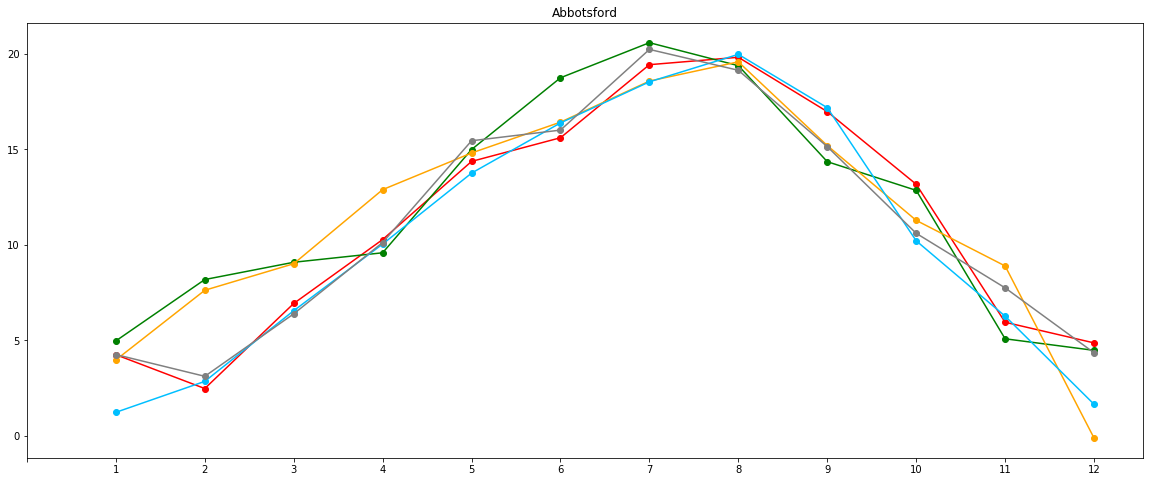

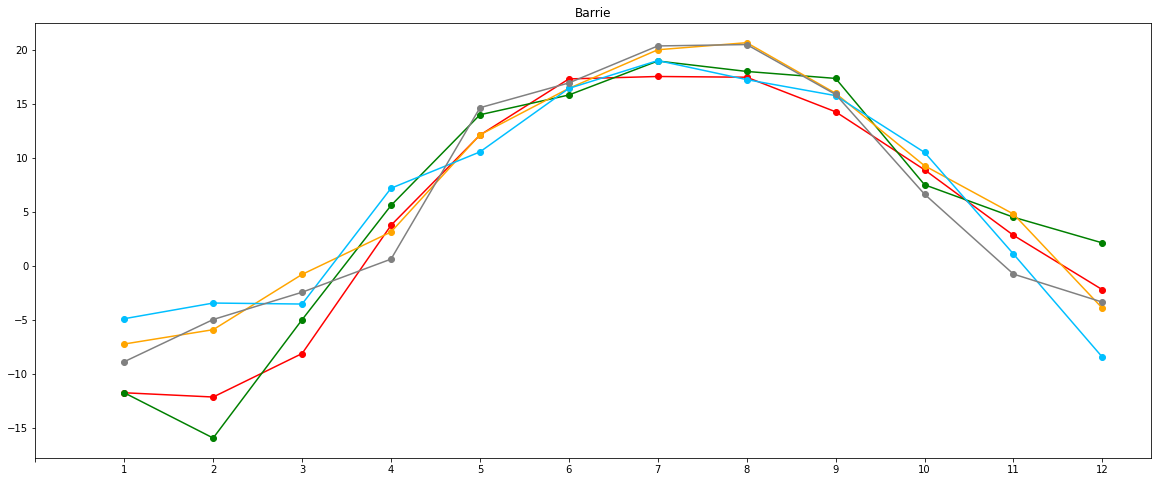

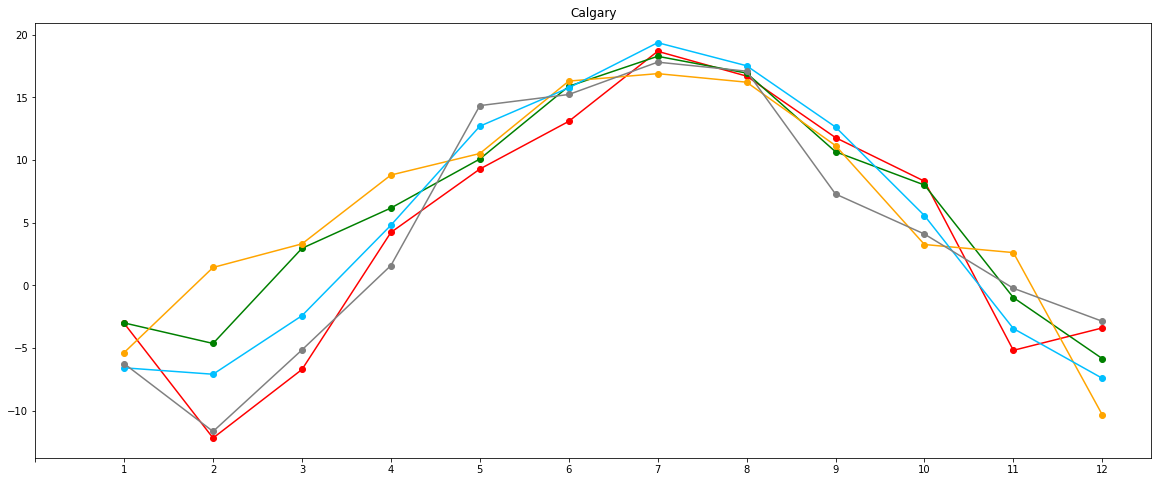

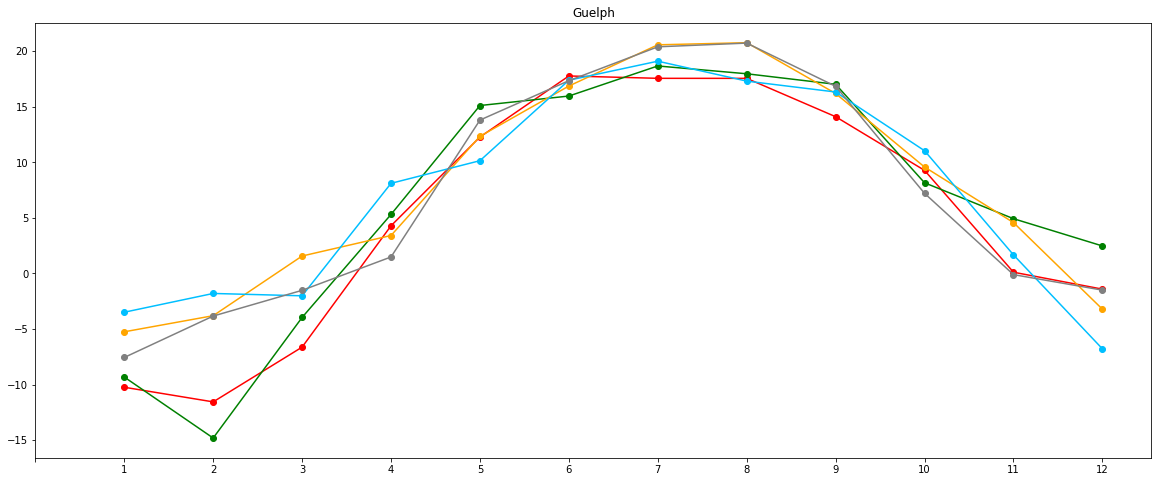

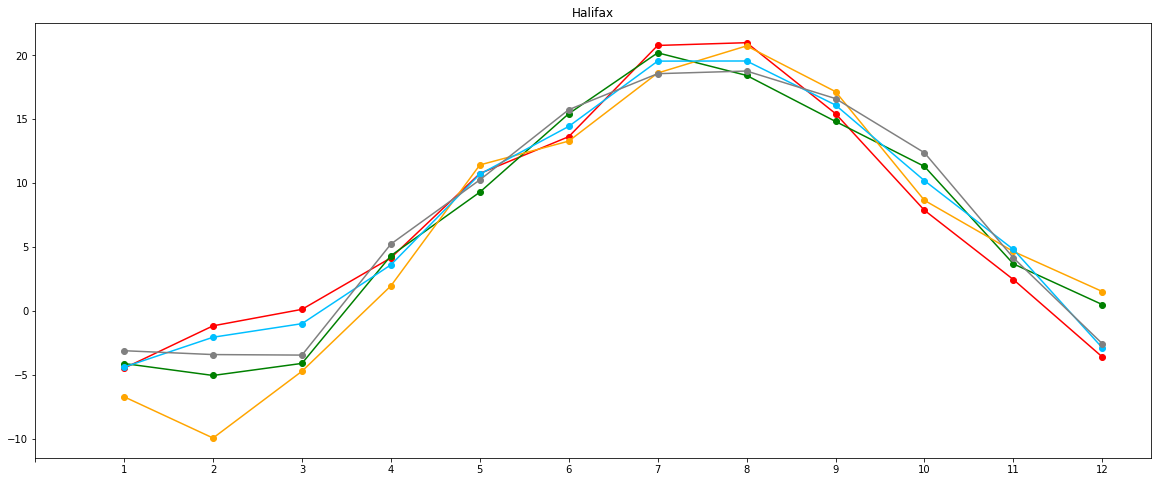

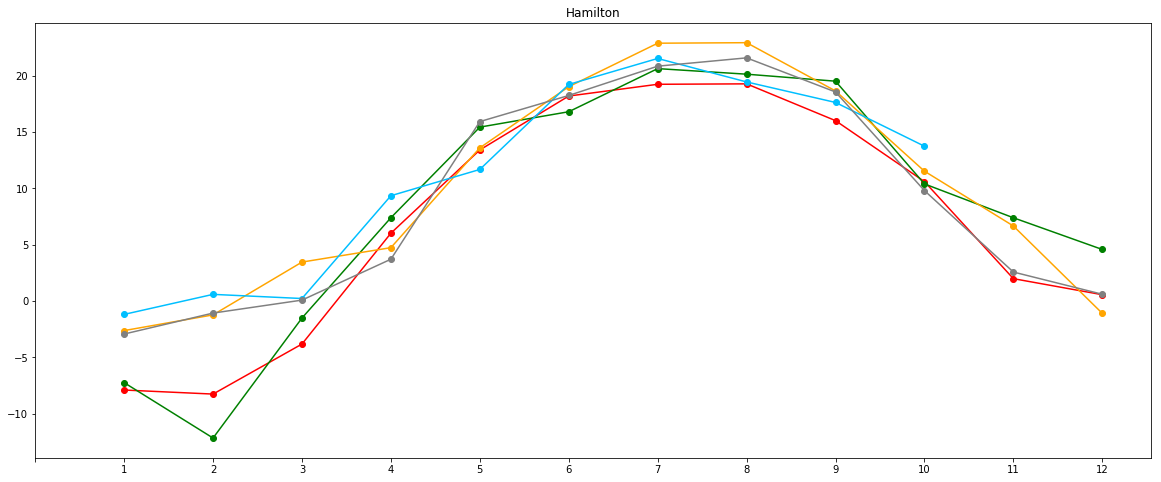

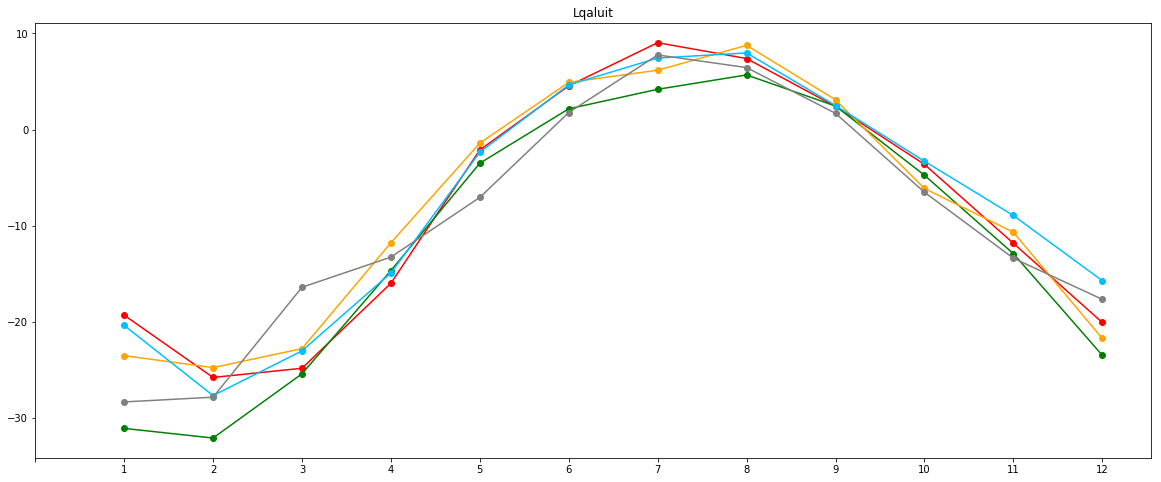

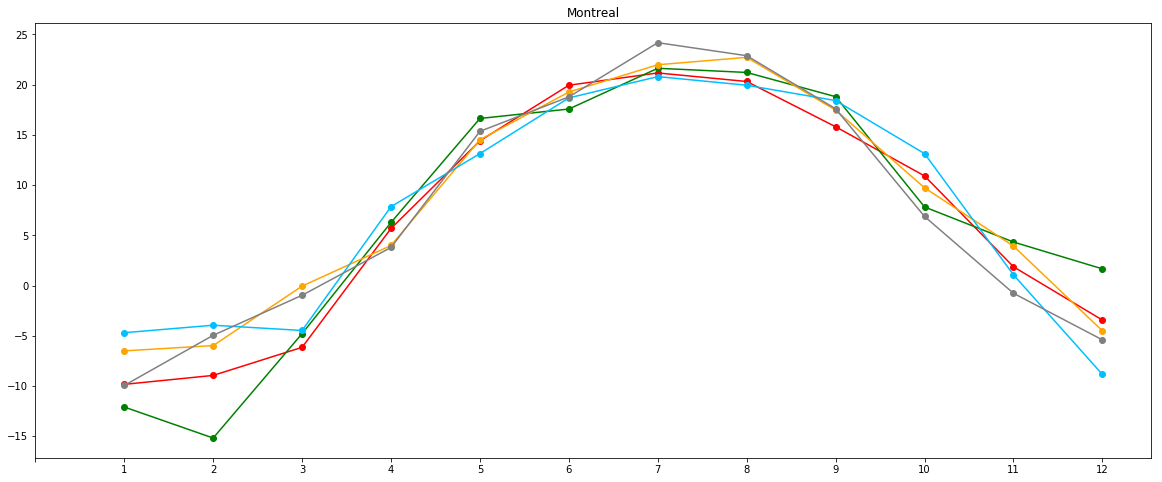

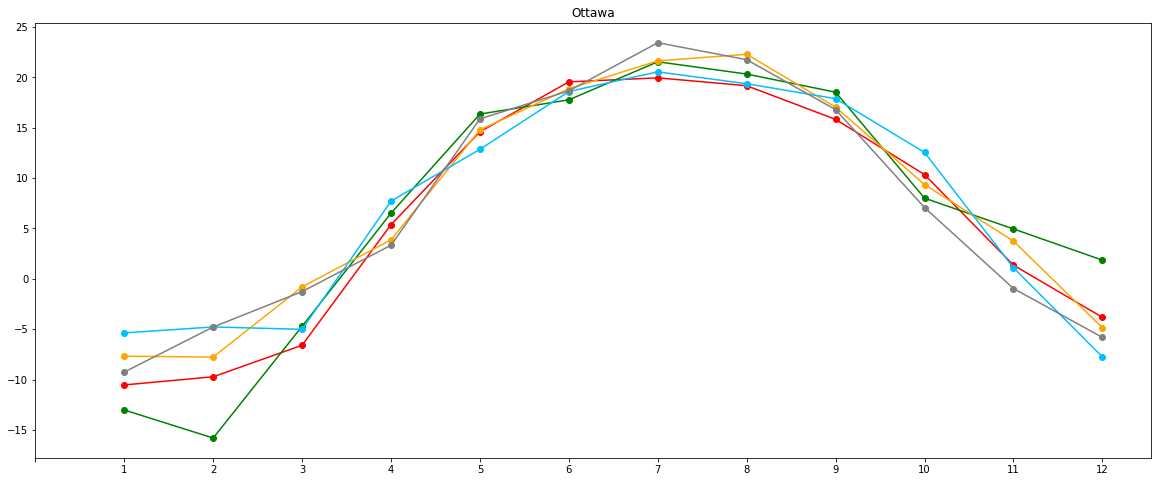

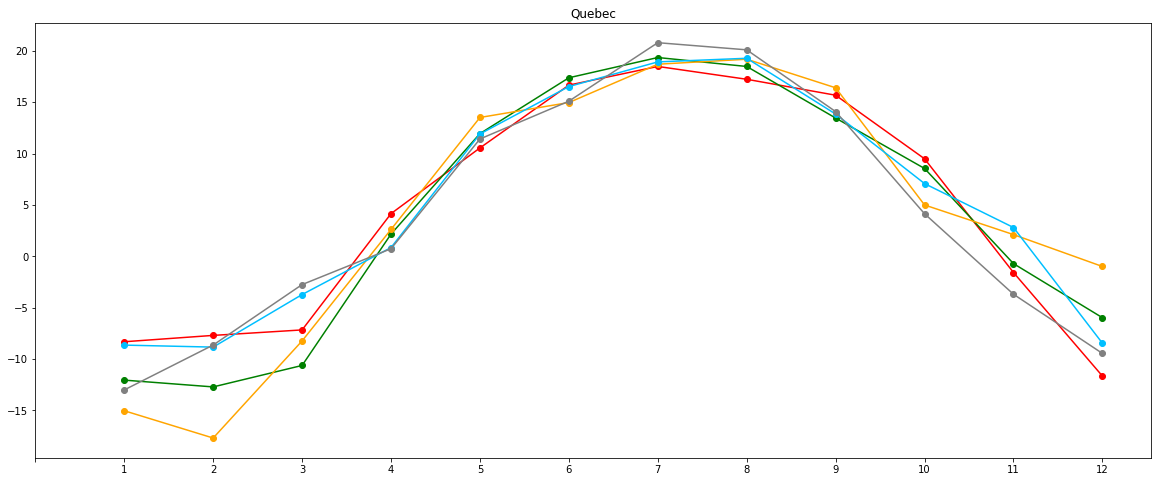

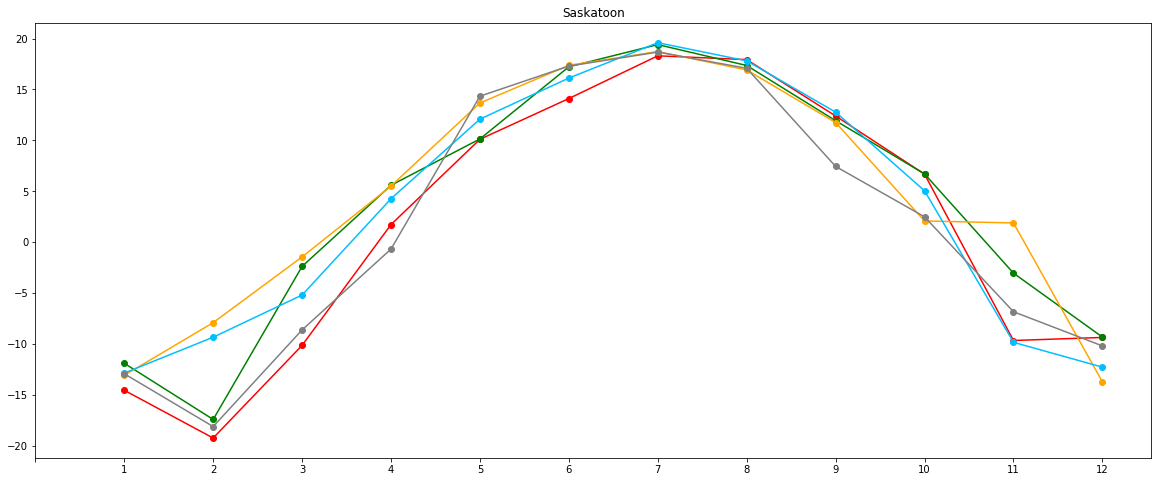

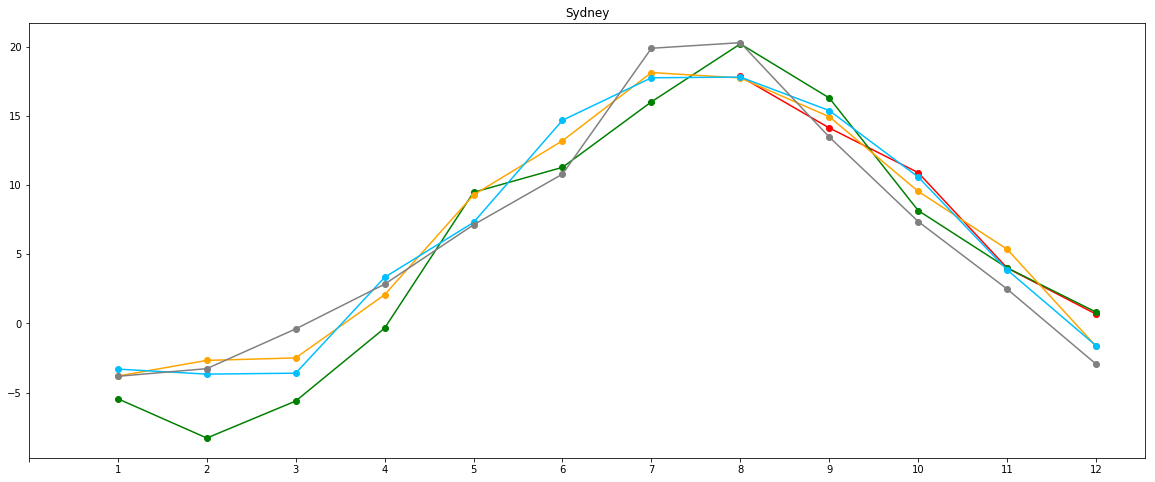

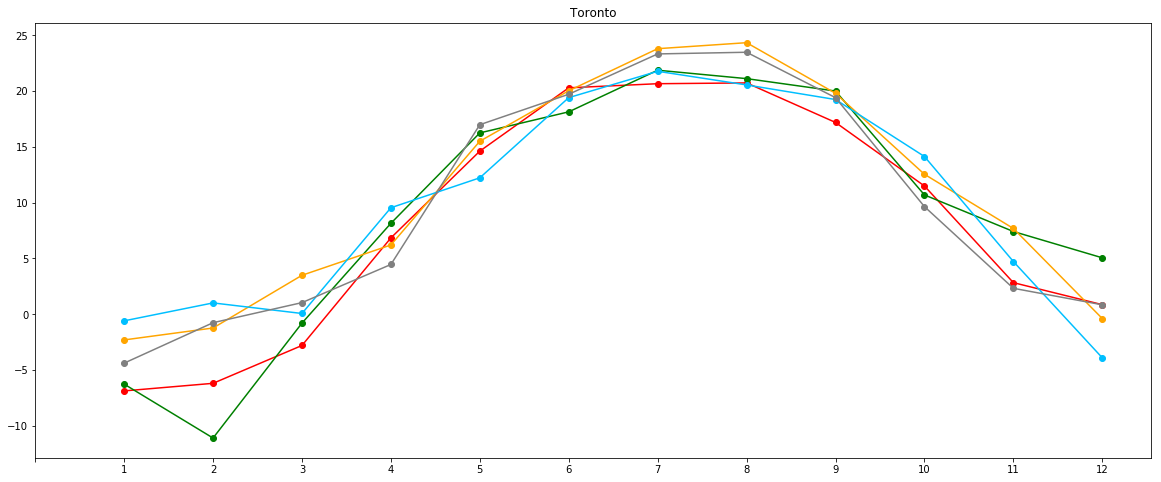

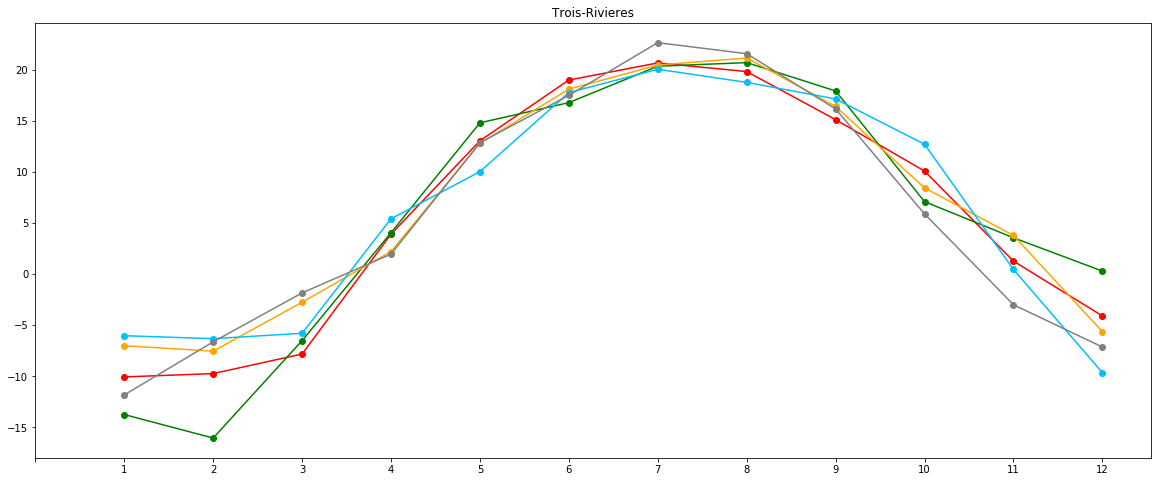

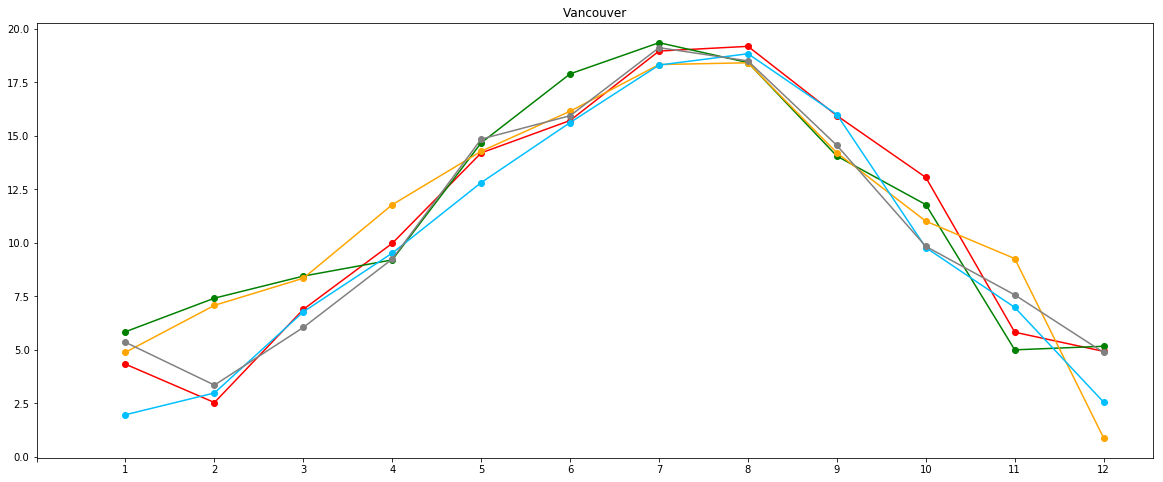

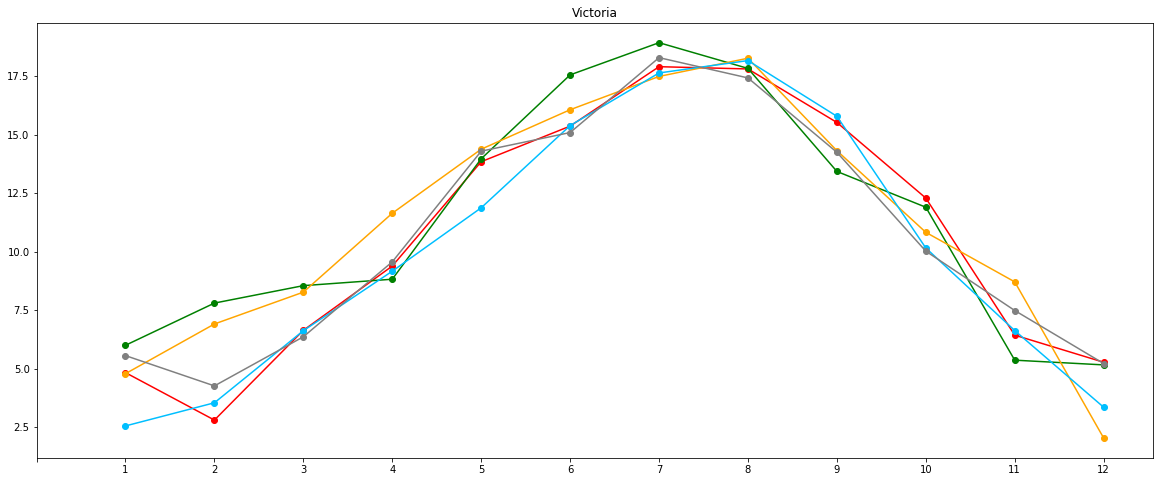

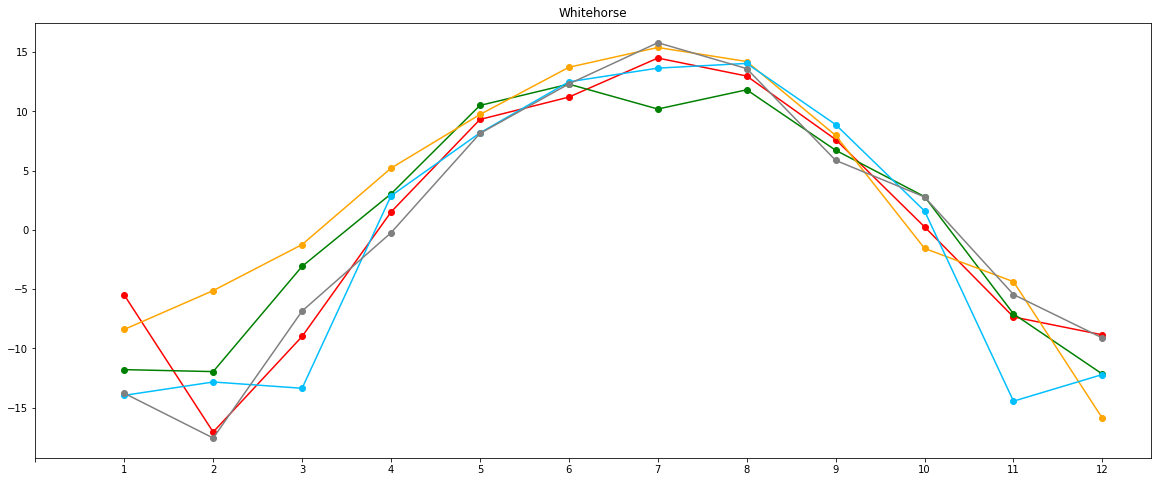

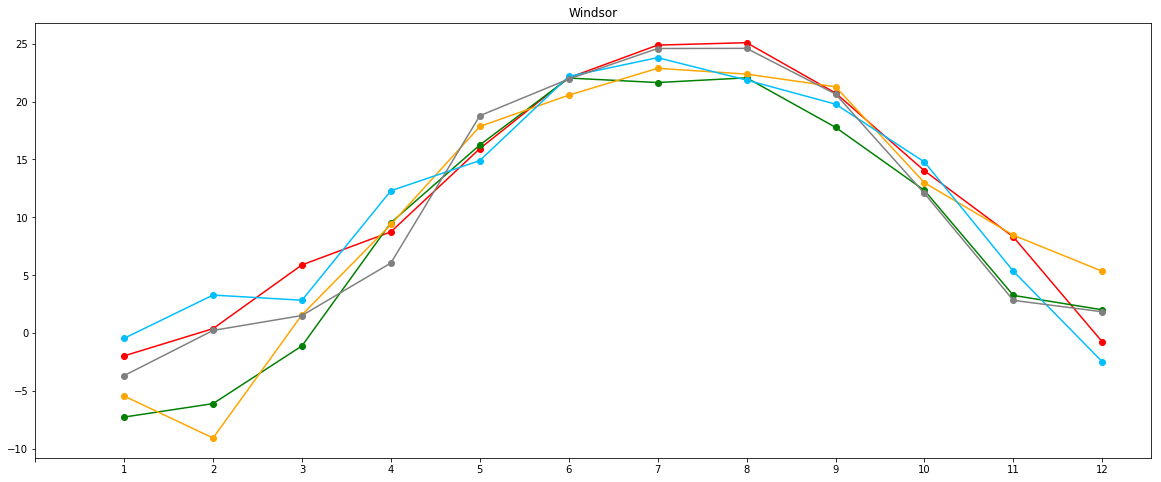

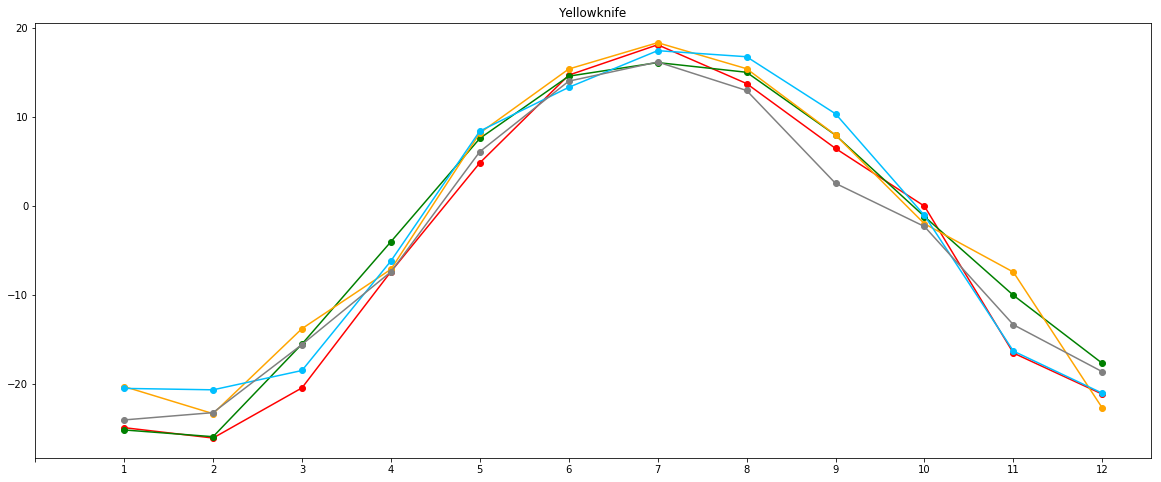

In [5]:
for f in fileList:
    stemp=os.listdir('./dataset/Canada/'+f)
    temp=[]
    for s in stemp:
        temp.append(pd.read_csv('./dataset/Canada/'+ f +'/'+s,header=None,sep=',',encoding='utf-8',skiprows=list(i for i in range(26)),engine='python'))
    grouped0=temp[0].groupby(temp[0][2])
    grouped1=temp[1].groupby(temp[1][2])
    grouped2=temp[2].groupby(temp[2][2])
    grouped3=temp[3].groupby(temp[3][2])
    grouped4=temp[4].groupby(temp[4][2])
    fig=plt.figure(figsize=(20, 8))
    ax=fig.add_subplot(1,1,1)
    ax.set_title(f)
    ax.plot(grouped0.mean()[9],'ko-',color='r',label='2014')
    ax.plot(grouped1.mean()[9],'ko-',color='g',label='2015')
    ax.plot(grouped2.mean()[9],'ko-',color='orange',label='2016')
    ax.plot(grouped3.mean()[9],'ko-',color='deepskyblue',label='2017')
    ax.plot(grouped4.mean()[9],'ko-',color='grey',label='2018')
    ticks =ax.set_xticks([y for y in range(13)])
    labels = ax.set_xticklabels(['','1','2','3','4','5','6','7','8','9','10','11','12'])

In [6]:
fileList=os.listdir('./dataset/Owwata')

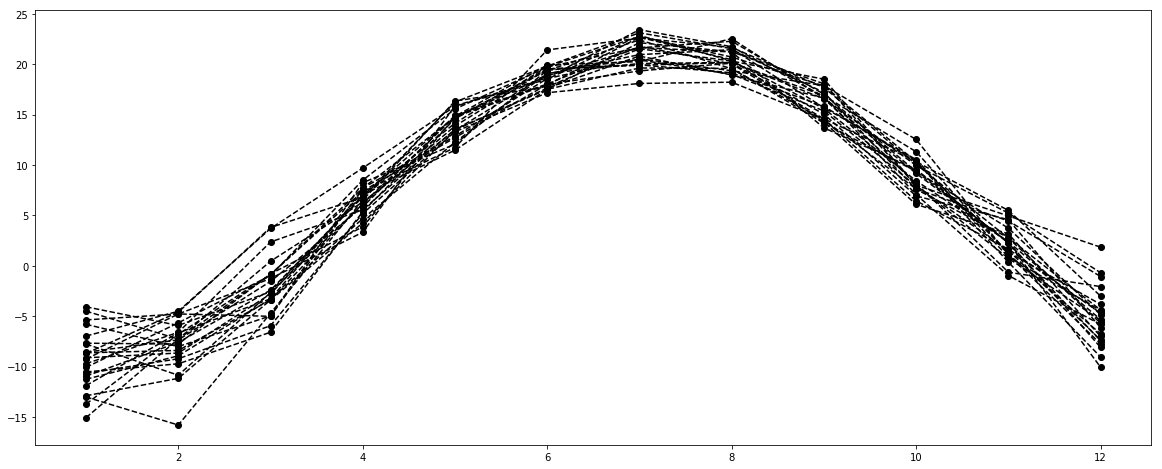

In [7]:
temp=[]
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
for f in fileList:
    temp.append(pd.read_csv('./dataset/Owwata/'+f,header=None,sep=',',encoding='utf-8',skiprows=list(i for i in range(26)),engine='python'))
for t in range(len(temp)):
    ax.plot(temp[t].groupby(temp[t][2]).mean()[9],'ko--')

    
    

[6.596986301369861, 7.454395604395605, 5.420547945205483, 6.333424657534257, 6.555068493150681, 8.065109890109893, 7.456593406593403, 6.392582417582411, 6.367397260273969, 7.432967032967032, 8.182692307692312, 6.8870879120879085, 6.550684931506857, 6.500274725274727, 8.497527472527471, 7.9596153846153825, 8.488493150684931, 6.745604395604398, 6.423351648351651, 7.0456043956043874, 7.628767123287679, 7.5240997229916955, 7.324011299435036]


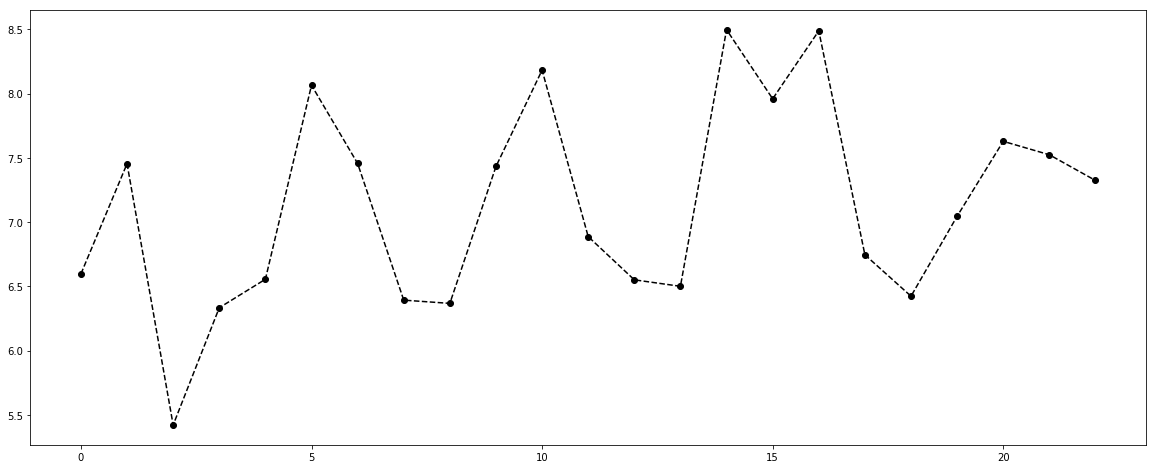

In [8]:
fileList=os.listdir('./dataset/Owwata')
temp=[]
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
for f in fileList:
    temp.append(pd.read_csv('./dataset/Owwata/'+f,header=None,sep=',',encoding='utf-8',skiprows=list(i for i in range(26)),engine='python'))
meantemp=[]
for t in range(len(temp)):
    meantemp.append(temp[t][9].mean())
print(meantemp)
ax.plot(meantemp,'ko--')

eng-daily-01011988-12311988.csv
eng-daily-01011991-12311991.csv
eng-daily-01011996-12311996.csv
eng-daily-01012003-12312003.csv
eng-daily-01012008-12312008.csv
eng-daily-01012013-12312013.csv
eng-daily-01012018-12312018.csv


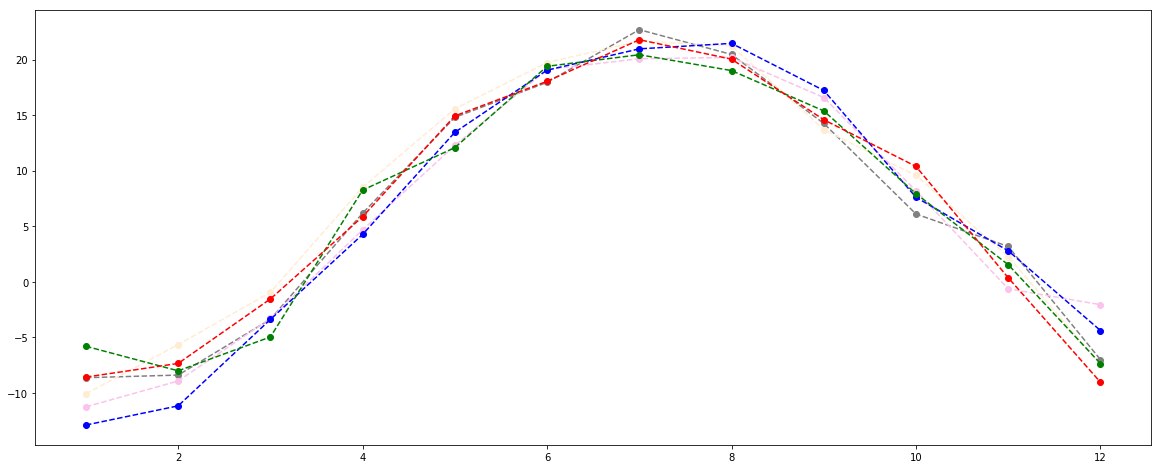

In [9]:
fileList=os.listdir('./dataset/Owwata-5')
temp=[]
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
for f in fileList:
    print(f)
    temp.append(pd.read_csv('./dataset/Owwata-5/'+f,header=None,sep=',',encoding='utf-8',skiprows=list(i for i in range(26)),engine='python'))
ax.plot(temp[0].groupby(temp[0][2]).mean()[9],'ko--',color='grey',label='2014')        
ax.plot(temp[1].groupby(temp[1][2]).mean()[9],'ko--',color='#ffecd2',label='2014')
ax.plot(temp[2].groupby(temp[2][2]).mean()[9],'ko--',color='#fbc2eb',label='2014')
ax.plot(temp[3].groupby(temp[3][2]).mean()[9],'ko--',color='blue',label='2014')
ax.plot(temp[4].groupby(temp[4][2]).mean()[9],'ko--',color='green',label='2014')
ax.plot(temp[5].groupby(temp[5][2]).mean()[9],'ko--',color='r',label='2014')


    

#### 季节性变化处理


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(color_codes=True)

In [11]:
fileList=os.listdir('./dataset/Owwata')
fileList

['eng-daily-01011988-12311988.csv',
 'eng-daily-01011991-12311991.csv',
 'eng-daily-01011992-12311992.csv',
 'eng-daily-01011996-12311996.csv',
 'eng-daily-01012000-12312000.csv',
 'eng-daily-01012001-12312001.csv',
 'eng-daily-01012002-12312002.csv',
 'eng-daily-01012003-12312003.csv',
 'eng-daily-01012004-12312004.csv',
 'eng-daily-01012005-12312005.csv',
 'eng-daily-01012006-12312006.csv',
 'eng-daily-01012007-12312007.csv',
 'eng-daily-01012008-12312008.csv',
 'eng-daily-01012009-12312009.csv',
 'eng-daily-01012010-12312010.csv',
 'eng-daily-01012011-12312011.csv',
 'eng-daily-01012012-12312012.csv',
 'eng-daily-01012013-12312013.csv',
 'eng-daily-01012014-12312014.csv',
 'eng-daily-01012015-12312015.csv',
 'eng-daily-01012016-12312016.csv',
 'eng-daily-01012017-12312017.csv',
 'eng-daily-01012018-12312018.csv']

In [12]:
temp=[]
for f in fileList:
     temp.append(pd.read_csv('./dataset/Owwata/'+f,header=None,sep=',',encoding='utf-8',skiprows=list(i for i in range(26)),engine='python'))


In [13]:
mean_temp_month=[]
years=[]
for i in range(len(temp)):
    years.append(temp[i][1][0])
    mean_temp_month.append(temp[i].groupby(temp[i][2]).mean()[9])

In [20]:
pd.options.display.max_rows=40
df=pd.DataFrame(mean_temp_month,index=years)
df2=df.stack()

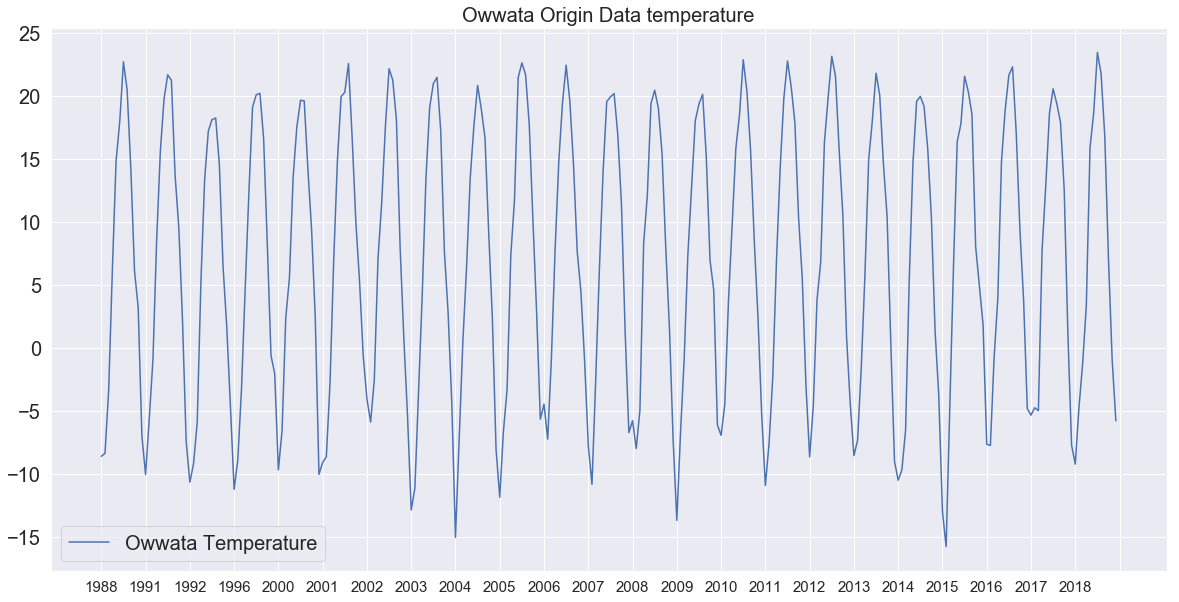

In [25]:
fig=plt.figure(figsize=(20, 10))
ax=fig.add_subplot(1,1,1)
ax.set_xticks([i  for i in range(0, 277, 12)])
labels = ax.set_xticklabels(years)
ax.set_title('Owwata Origin Data temperature',fontsize=20)
ax.plot(list(df2),label='Owwata Temperature')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)，
ax.legend(fontsize=20)

AttributeError: 'DecomposeResult' object has no attribute 'Residual'

<Figure size 1200x800 with 0 Axes>

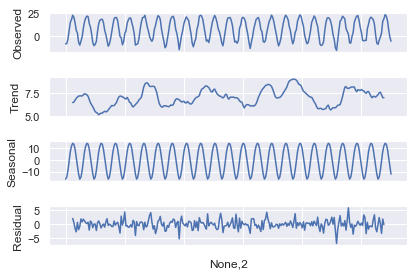

In [98]:
fig = plt.figure(dpi=200)
fig = decomposition.plot()
trend = decomposition.trend
Observed=decomposition.observed
Seasonal=decomposition.seasonal
Residual=decomposition.Residual
fig.set_size_inches(15, 30)

NameError: name 'DecomposeResult' is not defined

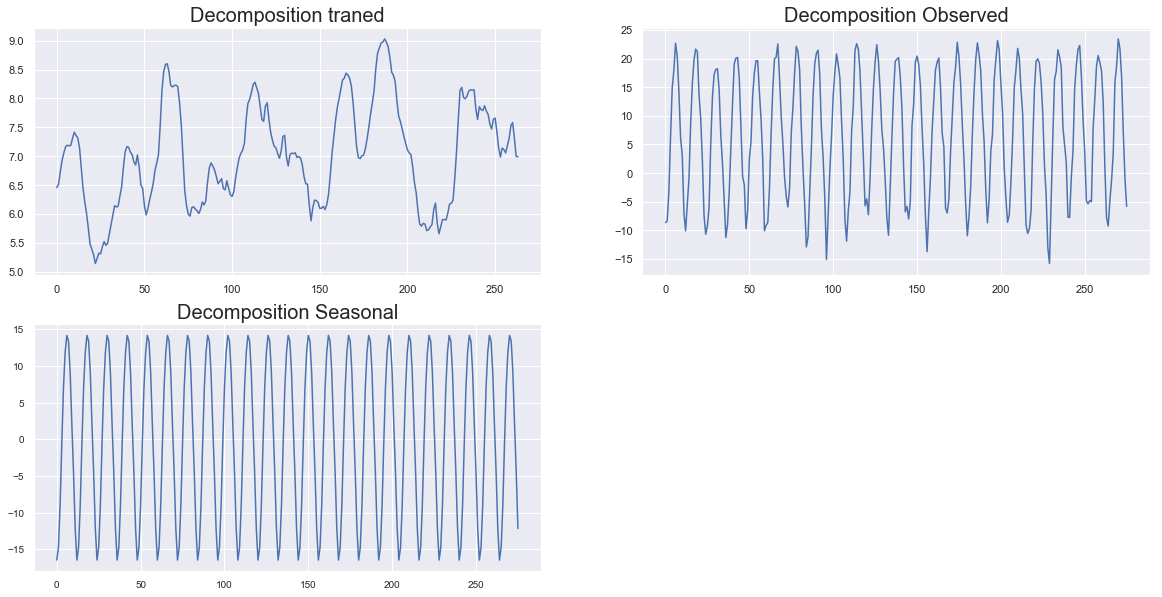

In [90]:
fig=plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
#ax1.set_xticks([i  for i in range(0, 277, 12)])
#labels = ax1.set_xticklabels(years)
ax1.set_title('Decomposition traned',fontsize=20)
ax1.plot(list(trend.dropna()),label='trend')
ax2.set_title('Decomposition Observed',fontsize=20)
ax2.plot(list(Observed.dropna()),label='Observed')
ax3.set_title('Decomposition Seasonal',fontsize=20)
ax3.plot(list(Seasonal.dropna()),label='Seasonal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.legend(fontsize=10)

      2 
1988  7     6.456071
      8     6.510075
      9     6.725023
      10    6.922774
      11    7.051842
      12    7.157993
1991  1     7.189145
      2     7.178123
      3     7.186784
      4     7.308213
      5     7.414503
      6     7.358159
      7     7.314871
      8     7.141112
      9     6.784835
      10    6.439123
      11    6.206986
      12    6.006515
1992  1     5.752012
      2     5.478894
              ...   
2016  11    7.871008
      12    7.779924
2017  1     7.723383
      2     7.556044
      3     7.469274
      4     7.637074
      5     7.659458
      6     7.428548
      7     7.146044
      8     6.983923
      9     7.139724
      10    7.113272
      11    7.056444
      12    7.185033
2018  1     7.308514
      2     7.528406
      3     7.582437
      4     7.309242
      5     6.995651
      6     6.990535
Length: 264, dtype: float64

In [42]:
rolling_mean=trend.rolling(12).mean()
rolling_std=trend.rolling(12).std()

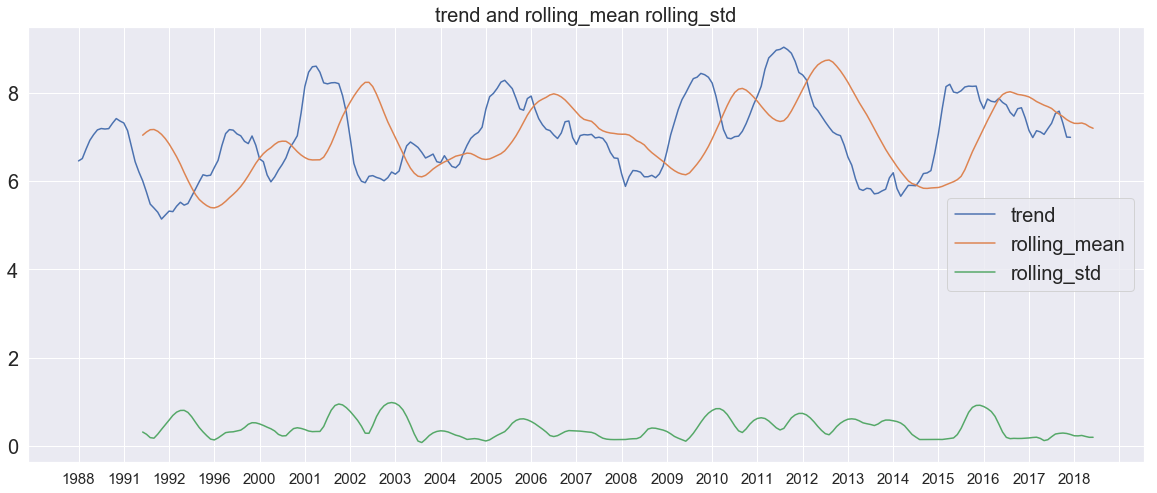

In [45]:
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(list(trend.dropna()),label='trend')
ax.plot(list(rolling_mean),label='rolling_mean')
ax.plot(list(rolling_std),label='rolling_std')
ax.set_title('trend and rolling_mean rolling_std',fontsize=20)
ax.set_xticks([i  for i in range(0, 277, 12)])
labels = ax.set_xticklabels(years)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
ax.legend(fontsize=20)

In [47]:
diff_mean=rolling_mean-rolling_mean.shift(1)
diff_std=rolling_std-rolling_std.shift(1)

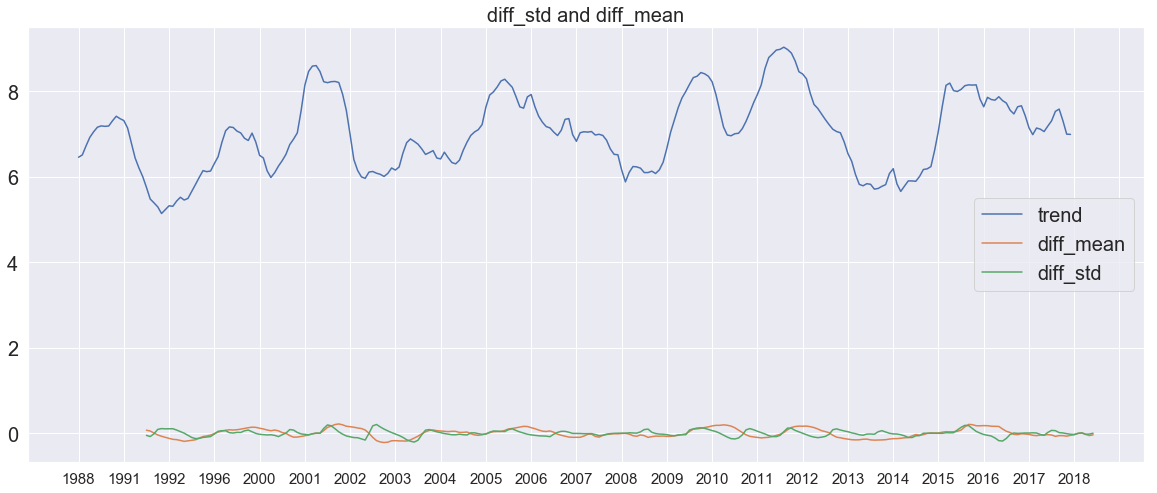

In [49]:
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(list(trend.dropna()),label='trend')
ax.plot(list(diff_mean),label='diff_mean')
ax.plot(list(diff_std),label='diff_std')
ax.set_title('diff_std and diff_mean',fontsize=20)
ax.set_xticks([i  for i in range(0, 277, 12)])
labels = ax.set_xticklabels(years)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
ax.legend(fontsize=20)

#### 读取nc 文件

In [124]:
import numpy as np
import pandas as pd
import netCDF4 as nc

stt=nc.Dataset('./dataset/sst.mnmean.nc')
stt

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >
    instrument: Conventional thermometers
    source_comment: SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker
    geospatial_lon_min: -1.0
    geospatial_lon_max: 359.0
    geospatial_laty_max: 89.0
    geospatial_laty_min: -89.0
    geospatial_lat_max: 89.0
    geospatial_lat_min: -89.0
    

In [125]:
pd.options.display.max_rows=10
time=np.array(stt.variables['time'])
s_lon=np.array(stt.variables['lon'])
s_lat=np.array(stt.variables['lat'])
sst=stt.variables['sst'][:]

In [126]:
df=pd.DataFrame(time)
df

,0
0,19723.0
1,19754.0
2,19782.0
3,19813.0
4,19843.0
...,...
1980,79988.0
1981,80019.0
1982,80047.0
1983,80078.0


In [159]:
s_lon=pd.DataFrame(s_lon)
s_lon[0][19]

38.0

In [129]:
s_lat=pd.DataFrame(s_lat)
s_lat

,0
0,88.0
1,86.0
2,84.0
3,82.0
4,80.0
...,...
84,-80.0
85,-82.0
86,-84.0
87,-86.0


In [200]:
sst_time=stt.variables['time']
len(sst_time)

1985

In [205]:
from netCDF4 import num2date, date2num
time=[]
for t in range(len(sst_time)):
    time.append(int(str(num2date(sst_time[t],units=sst_time.units))[0:4]))
sst_years=list(set(time))
print(sst_years)

[1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


#### 假设需要12-1-2月的温度

In [202]:
import numpy as np
lonindex=int(np.random.uniform()*(len(s_lon)))
latindex=int(np.random.uniform()*(len(s_lat)))
lonindex

30

In [203]:
print('lon')
print(s_lon[0][lonindex])
print('lat')
print(s_lat[0][latindex])
sst_bytime=[]
for t in range(len(sst_time)):
    sst_bytime.append(sst[t][latindex][lonindex])

lon
60.0
lat
78.0


In [208]:
sst_bytime

[-1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.510514,
 4.250332,
 3.8579369,
 2.4142246,
 -0.7182385,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.577054,
 4.2231607,
 4.09369,
 2.386568,
 -0.8125715,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.49757504,
 3.9452014,
 3.4412024,
 2.149263,
 -0.8411796,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.55321455,
 4.3166804,
 4.0271864,
 2.5164225,
 -0.69513047,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.55503845,
 4.251867,
 3.8277435,
 2.0635414,
 -0.84006774,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.6941359,
 3.9077654,
 3.676392,
 2.1372771,
 -0.7658789,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.6130488,
 4.337064,
 4.0096416,
 2.275377,
 -0.85939264,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.59256244,
 4.0440564,
 3.6813395,
 2.0502868,
 -0.887787,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -0.6026566,
 3.5885615,
 3.443557,
 1.9050477,
 -0.93597996,
 -1.8,
 -1.8,

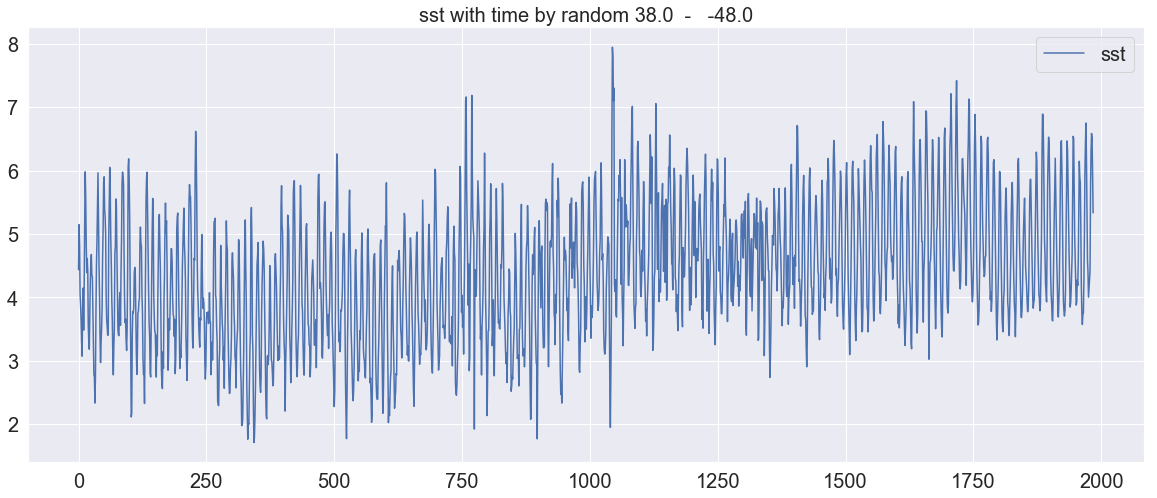

In [173]:
fig=plt.figure(figsize=(20, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(sst_bytime,label='sst')
ax.set_title('sst with time by random %s  -   %s'%(s_lon[0][lonindex],s_lat[0][latindex]),fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(fontsize=20)

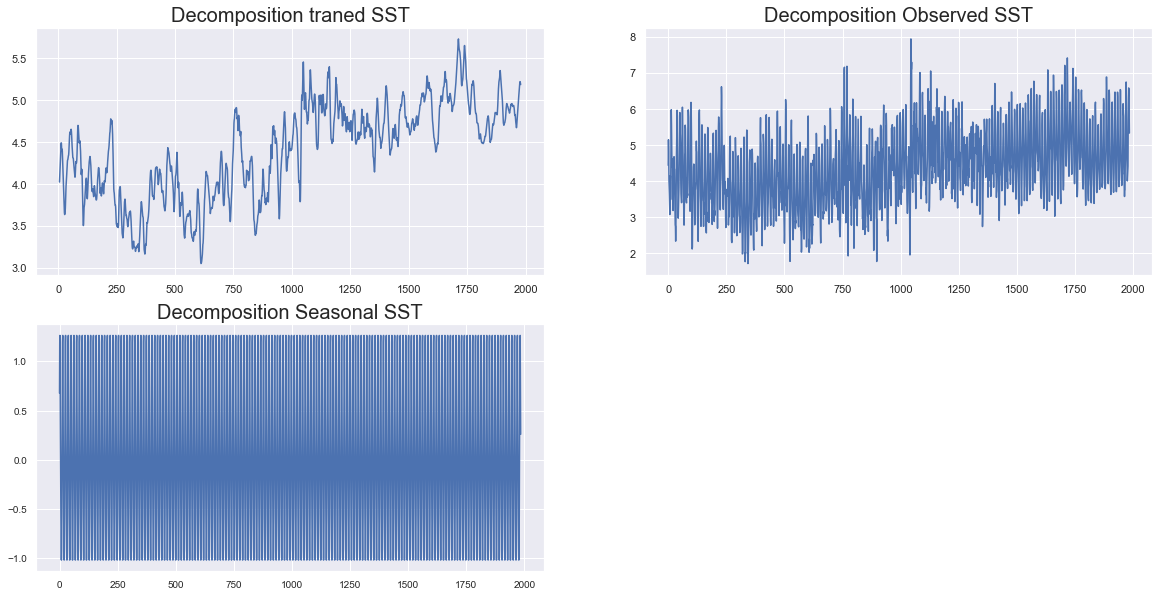

In [178]:
decomposition1 = seasonal_decompose(sst_bytime,freq=12)
trend = decomposition1.trend
Observed=decomposition1.observed
Seasonal=decomposition1.seasonal
fig=plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
#ax1.set_xticks([i  for i in range(0, 277, 12)])
#labels = ax1.set_xticklabels(years)
ax1.set_title('Decomposition traned SST',fontsize=20)
ax1.plot(list(trend),label='trend')
ax2.set_title('Decomposition Observed SST',fontsize=20)
ax2.plot(list(Observed),label='Observed')
ax3.set_title('Decomposition Seasonal SST',fontsize=20)
ax3.plot(list(Seasonal),label='Seasonal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.legend(fontsize=10)

In [135]:
trend_sst=decomposition.trend
trend_sst=pd.Series(trend_sst)
rolling_mean_sst=trend_sst.rolling(12).mean()
rolling_std_sst=trend_sst.rolling(12).std()

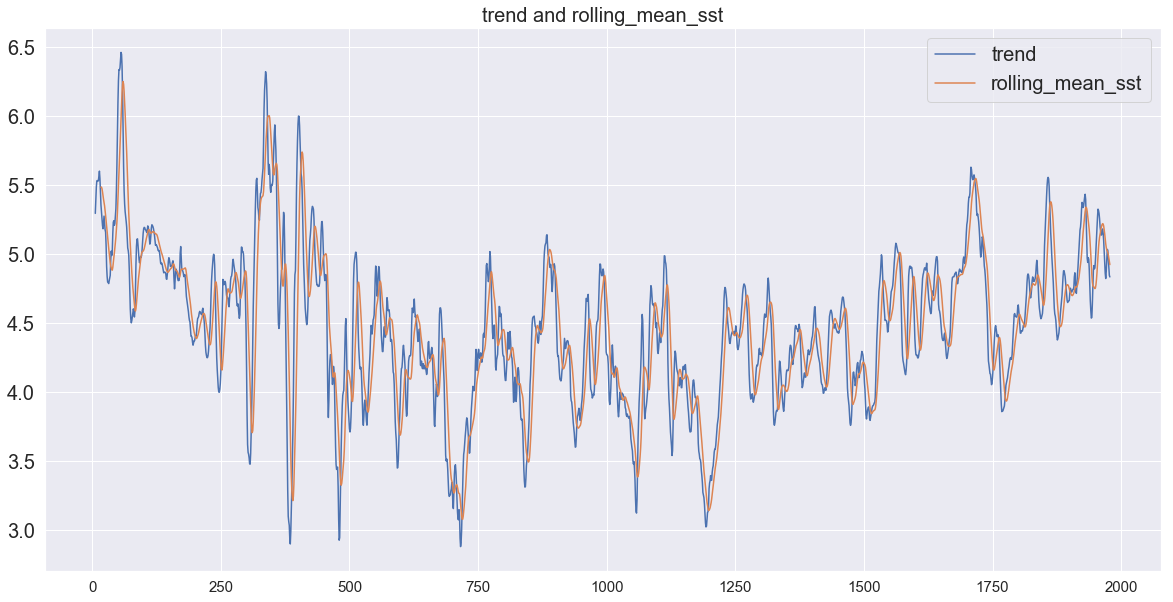

In [207]:
fig=plt.figure(figsize=(20, 10))
ax=fig.add_subplot(1,1,1)
ax.plot(trend_sst,label='trend')
ax.plot(list(rolling_mean_sst),label='rolling_mean_sst')
ax.set_title('trend and rolling_mean_sst',fontsize=20)
#labels = ax.set_xticklabels(years)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
ax.legend(fontsize=20)

In [184]:
diff_mean_sst=rolling_mean_sst-rolling_mean_sst.shift(1)

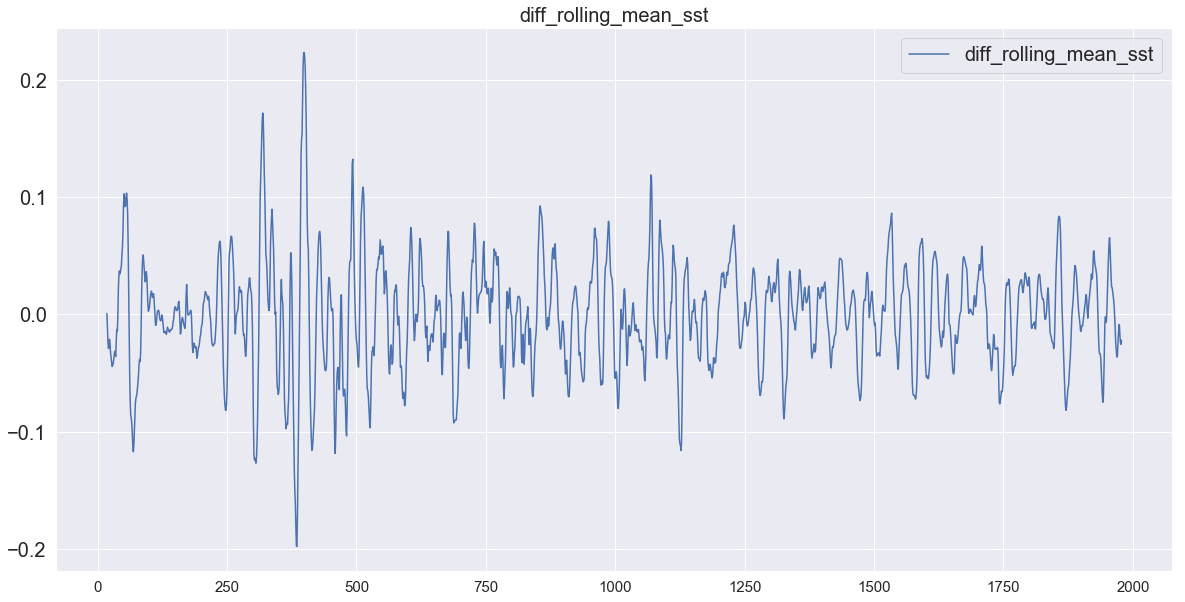

In [206]:
fig=plt.figure(figsize=(20, 10))
ax=fig.add_subplot(1,1,1)
ax.plot(list(diff_mean_sst),label='diff_rolling_mean_sst')
ax.set_title('diff_rolling_mean_sst',fontsize=20)
#labels = ax.set_xticklabels(years)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
ax.legend(fontsize=20)